In [1]:
import pandas as pd

In [2]:
from libraries.client_stashapp import get_stashapp_client

stash = get_stashapp_client()

d Using stash (v0.25.1-0) endpoint at http://fraktal.auvilankuja.fi:9999/graphql


In [5]:
def get_parent_studio_id(studio):
    if studio["parent_studio"] is not None:
        return studio["parent_studio"]["id"]
    return None

studios = stash.find_studios({})
df_studios = pd.DataFrame(studios)
df_studios["parent_studio_id"] = df_studios.apply(get_parent_studio_id, axis=1)

In [6]:
performers = stash.find_performers({})
df_performers = pd.DataFrame(performers)


In [7]:
# Lookup functions
def get_by_parent_studio(parent_studio_id):
    return df_studios[df_studios["parent_studio_id"] == parent_studio_id]

def get_studio(studio_id):
    return df_studios[df_studios["id"] == studio_id]

def get_performer(performer_id):
    return df_performers[df_performers["id"] == performer_id]

In [136]:
current_studios = get_by_parent_studio("229")
# current_studios = get_studio("74")
current_studio_ids = current_studios["id"].to_list()

current_studios

,id,name,url,parent_studio,child_studios,aliases,ignore_auto_tag,image_path,scene_count,image_count,gallery_count,performer_count,movie_count,stash_ids,rating100,details,created_at,updated_at,movies,parent_studio_id
5,253,8th Street Latinas,https://www.realitykings.com/scenes?site=1,{'id': '229'},[],[],False,http://fraktal.auvilankuja.fi:9999/studio/253/...,2,0,0,2,0,"[{'endpoint': 'https://stashdb.org/graphql', '...",NaN,,2024-01-19T03:08:31Z,2024-04-21T11:18:09Z,[],229
104,266,Big Naturals,https://www.realitykings.com/scenes?site=5,{'id': '229'},[],[],False,http://fraktal.auvilankuja.fi:9999/studio/266/...,16,0,0,16,0,"[{'endpoint': 'https://stashdb.org/graphql', '...",NaN,,2024-01-19T04:10:42Z,2024-04-21T11:18:11Z,[],229
150,280,CFNM Secret,https://www.realitykings.com/scenes?site=9,{'id': '229'},[],[],False,http://fraktal.auvilankuja.fi:9999/studio/280/...,3,0,0,9,0,"[{'endpoint': 'https://stashdb.org/graphql', '...",NaN,,2024-01-22T07:49:46Z,2024-04-21T11:18:14Z,[],229
165,258,Crazy College GFs,https://www.realitykings.com/scenes?site=51,{'id': '229'},[],[],False,http://fraktal.auvilankuja.fi:9999/studio/258/...,3,0,0,3,0,"[{'endpoint': 'https://stashdb.org/graphql', '...",NaN,,2024-01-19T03:10:15Z,2024-04-21T11:18:10Z,[],229
171,279,Cum Fiesta,https://www.realitykings.com/scenes?site=10,{'id': '229'},[],[],False,http://fraktal.auvilankuja.fi:9999/studio/279/...,1,0,0,2,0,"[{'endpoint': 'https://stashdb.org/graphql', '...",NaN,,2024-01-22T07:44:37Z,2024-04-21T11:18:14Z,[],229
193,260,Dare Dorm,https://www.realitykings.com/scenes?site=48,{'id': '229'},[],[],False,http://fraktal.auvilankuja.fi:9999/studio/260/...,1,0,0,4,0,"[{'endpoint': 'https://stashdb.org/graphql', '...",NaN,,2024-01-19T03:10:28Z,2024-04-21T11:18:10Z,[],229
255,114,Euro Sex Parties,https://www.realitykings.com/scenes?site=13,{'id': '229'},[],[],False,http://fraktal.auvilankuja.fi:9999/studio/114/...,6,0,0,13,0,"[{'endpoint': 'https://stashdb.org/graphql', '...",NaN,,2023-01-30T05:05:42Z,2024-04-21T11:17:46Z,[],229
295,230,First Time Auditions,https://www.realitykings.com/scenes?site=16,{'id': '229'},[],[],False,http://fraktal.auvilankuja.fi:9999/studio/230/...,3,0,0,5,0,"[{'endpoint': 'https://stashdb.org/graphql', '...",NaN,,2024-01-17T14:24:54Z,2024-04-21T11:18:06Z,[],229
331,264,GF Revenge,https://www.realitykings.com/scenes?site=49,{'id': '229'},[],[],False,http://fraktal.auvilankuja.fi:9999/studio/264/...,1,0,0,3,0,"[{'endpoint': 'https://stashdb.org/graphql', '...",NaN,,2024-01-19T04:09:26Z,2024-04-21T11:18:11Z,[],229
365,274,HD Love,https://www.realitykings.com/scenes?site=20,{'id': '229'},[],[],False,http://fraktal.auvilankuja.fi:9999/studio/274/...,12,0,0,19,0,"[{'endpoint': 'https://stashdb.org/graphql', '...",NaN,,2024-01-20T04:12:07Z,2024-04-21T11:18:13Z,[],229


In [146]:
# Find scenes with specific title
# scenes_data = stash.find_scenes({ "title": { "value": "sucker", "modifier": "INCLUDES" } }, filter={ "per_page": 40, "page": 1, "sort": "date", "direction": "DESC" })
# scenes_data = stash.find_scenes({ "performers": { "value": ["210"], "excludes": [], "modifier": "INCLUDES_ALL" } }, filter={ "per_page": 120, "page": 6, "sort": "path", "direction": "DESC" })
scenes_data = stash.find_scenes({
    "studios": { "value": current_studio_ids, "excludes": [], "modifier": "INCLUDES" },
    "stash_id_endpoint": { "endpoint": "", "stash_id": "", "modifier": "NOT_NULL" },
}, filter={ "per_page": 500, "page": 1, "sort": "created_at", "direction": "DESC" })
scenes_df = pd.DataFrame(scenes_data)
print(len(scenes_df))

300


In [147]:
def get_path(files):
    return files[0]["path"] if files else None

def get_basename(files):
    return files[0]["basename"] if files else None

def get_first_file_resolution(files):
    return str(files[0]["width"]) + "x" + str(files[0]["height"]) if files else None

def get_studio_value(studio):
    if (studio is None):
        return "Unknown Studio"

    stash_studio = get_studio(studio["id"])
    if stash_studio.empty:
        return "Unknown Studio"
    
    parent_stash_studio = get_studio(stash_studio["parent_studio_id"].iloc[0])
    if not parent_stash_studio.empty:
        return parent_stash_studio["name"].iloc[0] + "꞉ " + stash_studio["name"].iloc[0]

    return stash_studio["name"].iloc[0]


def get_performers(performers):
    if len(performers) == 0:
        return "Unknown performers"

    stash_performers = []
    for performer in performers:
        stash_performer = get_performer(performer["id"])
        if not stash_performer.empty:
            stash_performers.append(stash_performer)
        else:
            raise "Performer not found with ID: " + performer["id"]
    
    # Concatenate the data frames into a single data frame
    df_stash_performers = pd.concat(stash_performers)

    # Sort by gender with a custom order and then by name
    # Define a custom sort order for gender
    gender_priority = {
        'TRANSGENDER_FEMALE': 1,
        'FEMALE': 2,
        'MALE': 3
    }
    
    # Map the 'gender' column to these priorities
    df_stash_performers['gender_priority'] = df_stash_performers['gender'].map(gender_priority).fillna(4)  # Any undefined genders get a default value

    # Now sort by this priority, and then by name
    
    df_stash_performers.sort_values(by=['gender_priority', 'name'], inplace=True)
    
    # Cleanup: remove the auxiliary 'gender_priority' column if no longer needed
    df_stash_performers.drop('gender_priority', axis=1, inplace=True)

    # Return a comma-separated string of names
    return ', '.join(df_stash_performers['name'])

# Define a function to get the first file if available
def get_suffix(files):
    first_file = files[0]["basename"] if files else None
    file_suffix = os.path.splitext(first_file)[1] if first_file else None
    return file_suffix

def title_case_except_acronyms(text):
    words = text.split()
    title_cased_words = []
    for word in words:
        # Check if the word contains an apostrophe
        if "'" in word:
            # Split the word at the apostrophe and process each part
            parts = word.split("'")
            new_parts = [parts[0].title()]  # Always capitalize the part before the apostrophe
            if len(parts) > 1:
                # Never capitalize after the apostrophe
                new_parts.append(parts[1])
            # Rejoin the parts with an apostrophe
            title_cased_words.append("'".join(new_parts))
        else:
            # Apply the original logic if there's no apostrophe
            title_cased_words.append(word if word.isupper() and len(word) > 1 else word.title())

    return ' '.join(title_cased_words)

def clean_title(title):
    title = title_case_except_acronyms(title)
    return title.replace(":", "꞉").replace("?", "？").replace("/", "∕").replace("\\", "＼").replace("*", "＊").replace("\"", "＂").replace("<", "＜").replace(">", "＞").replace("|", "｜").replace("  ", " ")

import os
import re

def convert_stash_path_to_windows_path(files):
    # Check if files is not empty and contains a dictionary with a "path" key
    if not files or "path" not in files[0]:
        return None
    
    path = files[0]["path"]
    if path:
        # Try to extract the drive letter from the path using a regex
        match = re.search(r'/videos_(\w)/', path)
        if match:
            drive_letter = match.group(1).upper()
            # Replace '/videos_x/' with 'X:\' using the drive letter extracted
            path = re.sub(r'/videos_\w/', drive_letter + ':\\\\Culture\\\\Videos\\\\', path)
            # Normalize the path to use backslashes instead of forward slashes
            path = os.path.normpath(path)
        else:
            return None  # Return None if no matching pattern is found
    return path

# Apply the function to the 'files' column
scenes_df['path'] = scenes_df['files'].apply(get_basename)
scenes_df['windows_path'] = scenes_df['files'].apply(convert_stash_path_to_windows_path)
scenes_df['windows_directory'] = scenes_df['files'].apply(lambda files: os.path.dirname(convert_stash_path_to_windows_path(files)))
scenes_df['basename'] = scenes_df['files'].apply(get_basename)
scenes_df['resolution'] = scenes_df['files'].apply(get_first_file_resolution)
scenes_df['primary_studio'] = scenes_df['studio'].apply(get_studio_value)
scenes_df['performers_str'] = scenes_df['performers'].apply(get_performers)
scenes_df['suffix'] = scenes_df['files'].apply(get_suffix)


In [148]:
import pandas as pd
import requests


url = f"http://localhost:33333/api/files?status=both"
response = requests.get(url)
laputin_files = response.json()
df_laputin_files = pd.DataFrame(laputin_files)
df_laputin_files['xxhash'] = df_laputin_files['metadata'].apply(
    lambda x: x.get('hashes', {}).get('xxhash') if x else None
)
df_laputin_files = df_laputin_files.drop_duplicates(subset="path")

scenes_df['windows_path'].notnull().all()
scenes_df["xxhash"] = scenes_df["windows_path"].map(df_laputin_files.set_index("path")["xxhash"])

In [149]:
scenes_df[scenes_df["xxhash"].isnull()]

,id,title,code,details,director,urls,date,rating100,organized,o_counter,...,sceneStreams,path,windows_path,windows_directory,basename,resolution,primary_studio,performers_str,suffix,xxhash
0,16723,Business Butt Sex,,"Business is slow at the restaurant, so bartend...",,[https://www.realitykings.com/scene/4641401/bu...,2022-05-12,None,False,0,...,[{'url': 'http://fraktal.auvilankuja.fi:9999/s...,Reality Kings - Work Me Harder - 2022-05-12 - ...,X:\Culture\Videos\Sites\Reality Kings\Reality ...,X:\Culture\Videos\Sites\Reality Kings,Reality Kings - Work Me Harder - 2022-05-12 - ...,1920x1080,Reality Kings꞉ RK Prime,"Kenna James, Ricky Johnson",.mp4,NaN
1,16719,Influencer's Delight,,Hot influencer Kylie Rocket spots super fan Sc...,,[https://www.teenslovehugecocks.com/scene/8696...,2023-04-28,None,False,0,...,[{'url': 'http://fraktal.auvilankuja.fi:9999/s...,Reality Kings - Teens Love Huge Cocks - 2023-0...,X:\Culture\Videos\Sites\Reality Kings\Reality ...,X:\Culture\Videos\Sites\Reality Kings,Reality Kings - Teens Love Huge Cocks - 2023-0...,1920x1080,Reality Kings꞉ Teens Love Huge Cocks,"Kylie Rocket, Scott Nails",.mp4,NaN
2,16721,Lesbifriends,,Tensions between randy roommates Jenna Sativa ...,,[https://www.iafd.com/title.rme/title=lesbifri...,2018-04-17,None,False,0,...,[{'url': 'http://fraktal.auvilankuja.fi:9999/s...,Reality Kings - We Live Together - 2019-04-17 ...,X:\Culture\Videos\Sites\Reality Kings\Reality ...,X:\Culture\Videos\Sites\Reality Kings,Reality Kings - We Live Together - 2019-04-17 ...,1920x1080,Reality Kings꞉ We Live Together,"Jenna Sativa, Lexi Belle",.mp4,NaN
3,16720,Step Daughter Makes Up For Mom's Bitchy Attitude,9368221,Jay Snakes's wife has been getting on his case...,,[https://theporndb.net/scenes/faa88e05-c6a8-40...,2023-08-27,None,False,0,...,[{'url': 'http://fraktal.auvilankuja.fi:9999/s...,Reality Kings - Teens Love Huge Cocks - 2023-0...,X:\Culture\Videos\Sites\Reality Kings\Reality ...,X:\Culture\Videos\Sites\Reality Kings,Reality Kings - Teens Love Huge Cocks - 2023-0...,1920x1080,Reality Kings꞉ Teens Love Huge Cocks,"Amalia Davis, Jay Snake",.mp4,NaN
4,16722,We Live Together - Bursting Her Buttons,,Busty blonde Blake Blossom has a problem: her ...,,[https://www.realitykings.com/scene/8359561/we...,2023-01-23,None,False,0,...,[{'url': 'http://fraktal.auvilankuja.fi:9999/s...,Reality Kings - We Live Together - 2023-01-23 ...,X:\Culture\Videos\Sites\Reality Kings\Reality ...,X:\Culture\Videos\Sites\Reality Kings,Reality Kings - We Live Together - 2023-01-23 ...,1920x1080,Reality Kings꞉ We Live Together,"Blake Blossom, Breyana Moore",.mp4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1097,Licking Time,,Conny and her boyfriend were in town for a few...,,[https://www.realitykings.com/scene/4151/licki...,2011-03-23,None,False,0,...,[{'url': 'http://fraktal.auvilankuja.fi:9999/s...,Reality Kings - Mikes Apartment - 2011-03-23 -...,X:\Culture\Videos\Sites\Reality Kings\Reality ...,X:\Culture\Videos\Sites\Reality Kings,Reality Kings - Mikes Apartment - 2011-03-23 -...,1920x1080,Reality Kings꞉ Mike's Apartment,"Connie Carter, Denson Mac",.mp4,NaN
295,962,Searching For A Selfie Slut,,Britney Light's boyfriend is so into his video...,,[https://www.sneakysex.com/scene/3106591/],2018-09-22,None,False,0,...,[{'url': 'http://fraktal.auvilankuja.fi:9999/s...,Reality Kings - Sneaky Sex - 2018-09-22 - Brit...,X:\Culture\Videos\Sites\Reality Kings\Reality ...,X:\Culture\Videos\Sites\Reality Kings,Reality Kings - Sneaky Sex - 2018-09-22 - Brit...,1920x1080,Reality Kings꞉ Sneaky Sex,"Britney Light, Zac Wild",.mp4,NaN
296,657,Ass On Alexis,,Alexis came back around to the Apartment looki...,,[https://www.realitykings.com/scene/8374/ass-o...,2013-06-12,None,False,0,...,[{'url': 'http://fraktal.auvilankuja.fi:9999/s...,Reality Kings - Mikes Apartment - 2013-06-12 -...,X:\Culture\Videos\Sites\Reality Kings\Reality ...,X:\Culture\Videos\Sites\Reality Kings,Reality Kings - Mi

In [164]:
scenes_df['fs_title'] = scenes_df['title'].apply(clean_title)
# With studio code
scenes_df['new_filename'] = scenes_df['primary_studio'] + ' – ' + scenes_df['date'] + ' – ' + scenes_df['code'] + ' – ' + scenes_df['fs_title'] + ' – ' + scenes_df['performers_str'] + ' [' + scenes_df['xxhash'] + ']' + scenes_df['suffix']
# Without studio code
# scenes_df['new_filename'] = scenes_df['primary_studio'] + ' – ' + scenes_df['date'] + ' – ' + scenes_df['fs_title'] + ' – ' + scenes_df['performers_str'] + ' [' + scenes_df['xxhash'] + ']' + scenes_df['suffix']
scenes_df['new_path'] = scenes_df['windows_directory'] + '\\' + scenes_df['new_filename']

renames_df = scenes_df[['windows_path', 'new_path', 'xxhash']][scenes_df['windows_path'] != scenes_df['new_path']].sort_values(by='windows_path')
renames_df = renames_df[renames_df['new_path'].notnull()]

In [163]:
import os
import shutil
import pandas as pd

# Assuming renames_df is already defined and has columns 'windows_path', 'new_path', 'xxhash'

# Initialize empty DataFrames for success and failure results
success_df = pd.DataFrame(columns=renames_df.columns)
failed_df = pd.DataFrame(columns=renames_df.columns)

for index, row in renames_df.iterrows():
    old_path = row['windows_path']
    new_path = row['new_path']

    # Check for missing hash or new path
    if pd.isna(row['xxhash']):
        print(f"XXHash not found for {old_path}")
        failed_df = pd.concat([failed_df, pd.DataFrame([row])], ignore_index=True)
        continue
    if pd.isna(new_path):
        print(f"New path not found for {old_path}")
        failed_df = pd.concat([failed_df, pd.DataFrame([row])], ignore_index=True)
        continue

    # Attempt to move the file if the old path is a file and the new path does not exist
    if os.path.isfile(old_path):
        if not os.path.exists(new_path):
            try:
                shutil.move(old_path, new_path)
                print(f"Moved file from {old_path} to {new_path}")
                success_df = pd.concat([success_df, pd.DataFrame([row])], ignore_index=True)
            except Exception as e:
                print(f"Failed to move file from {old_path} to {new_path}: {e}")
                failed_df = pd.concat([failed_df, pd.DataFrame([row])], ignore_index=True)
        else:
            print(f"A file already exists in the new path: {new_path}")
            failed_df = pd.concat([failed_df, pd.DataFrame([row])], ignore_index=True)
    else:
        print(f"File does not exist: {old_path}")
        failed_df = pd.concat([failed_df, pd.DataFrame([row])], ignore_index=True)

# Now you have two DataFrames: success_df and failed_df
print("Successes:", success_df)
print("Failures:", failed_df)


XXHash not found for X:\Culture\Videos\Good Old In And Out\Hot Bush - 2014-10-25 - Cum on Bush - Cadence Lux Mirko Steel (WEBDL-1080p).mp4
XXHash not found for X:\Culture\Videos\Good Old In And Out\Lisa Hotlipps - Mike's Apartment - 2001-12-23 - Cock Hungry.mp4
XXHash not found for X:\Culture\Videos\Sites\Reality Kings\8thsl.15.10.09.melissa.moore.more.melissa.mp4
XXHash not found for X:\Culture\Videos\Sites\Reality Kings\Alexis Crystal, Angell Summers - Ass in heels.mp4
XXHash not found for X:\Culture\Videos\Sites\Reality Kings\Anikka Albrite & Ashley Fires - We Live Together - 2014-05-22 - Lusty Lips.mp4
XXHash not found for X:\Culture\Videos\Sites\Reality Kings\Ashley Fires, Kiara Diane & Sammie Rhodes - We Live Together - 2011-02-17 - Real Romance.mp4
XXHash not found for X:\Culture\Videos\Sites\Reality Kings\Dillion.Harper.Megapack_Dillion.Harper.WeLiveTogether.RealityKings.Maddy.Oreilly.Puss.And.Boobs.17Apr2014.1080p.mp4
XXHash not found for X:\Culture\Videos\Sites\Reality Kings\

In [145]:
failed_df

,windows_path,new_path,xxhash
0,X:\Culture\Videos\Good Old In And Out\Hot Bush...,X:\Culture\Videos\Good Old In And Out\Reality ...,79c8d525cb508509


Non-renaming things start from here.

In [46]:
# Find female performers
female_performers = stash.find_performers({ "gender": { "value": "FEMALE", "modifier": "EQUALS" } })
df_female_performers = pd.DataFrame(female_performers)
df_female_performers['birthdate'] = pd.to_datetime(df_female_performers['birthdate'])

In [47]:
favorite_performers = stash.find_performers({ "filter_favorites": True })
df_favorite_performers = pd.DataFrame(favorite_performers)
df_favorite_performers['birthdate'] = pd.to_datetime(df_favorite_performers['birthdate'])

In [48]:
from IPython.display import Image
from IPython.display import display

# Assuming df is your DataFrame and 'image_path' is your column with URLs
x = Image(url= df_favorite_performers['image_path'][0]) 
display(x)

In [33]:
%pip install matplotlib

     ---------------------------------------- 0.0/162.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.2 kB ? eta -:--:--
     -------------- ------------------------ 61.4/162.2 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 162.2/162.2 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.9/7.6 MB 29.7 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/7.6 MB 37.7 MB/s eta 0:00:01
   ------------------- -------------------- 3.8/7.6 MB 40.1 MB/s eta 0:00:01
   --------------------------- ------------ 5.2/7.6 MB 36.7 MB/s eta 0:00:01
   ---------------------------------- ----- 6.7/7.6 MB 38.8 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.6 MB 37.6 MB/s eta 0:00:01
   ---------------------------------------- 7.6/7.6 MB 34.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/187.7 kB ? eta -:--:--
   -----------

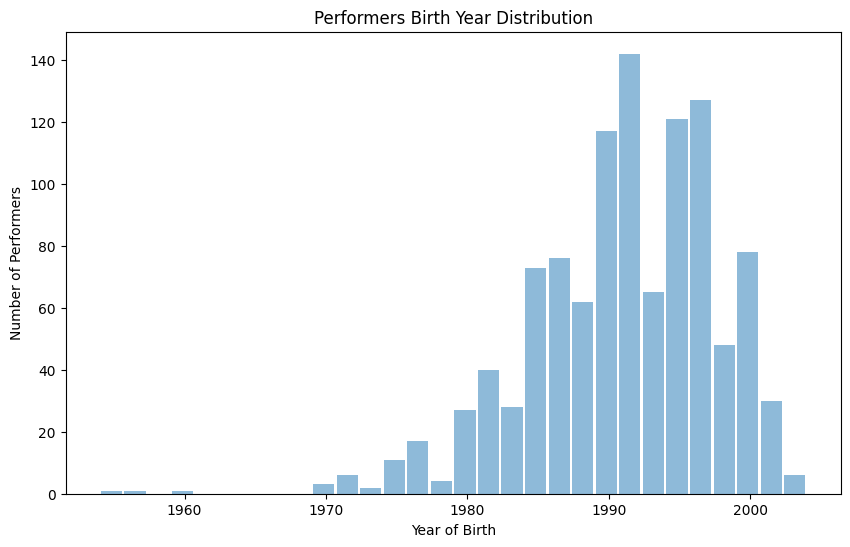

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df_female_performers['birthdate'].dt.year.hist(bins=30, alpha=0.5, rwidth=0.9)
plt.xlabel('Year of Birth')
plt.ylabel('Number of Performers')
plt.title('Performers Birth Year Distribution')
plt.grid(False)
plt.show()

In [ ]:
# Find scenes with specific performer
scenes_data = stash.find_scenes({ "title": { "value": "erections", "modifier": "INCLUDES" } }, filter={ "per_page": 40, "page": 1, "sort": "date", "direction": "DESC" })
scenes_df = pd.DataFrame(scenes_data)